
# Project: Investigate TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> I will be investigating The IMDB movie dataset in this jupyter notebook. The dataset contains information about 10,000+ movies including id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj. I will expore the data and find answers to some questions from the given dataset.


### Some Question for this Analysis
>Some of the questions we will be answering during this investigation are as follows:
1. What year has the record of least number of released movies?
2. Is the most popular Genre also the most profitable?
3. What is the correlation between popularity and profit?
4. Who are the top 3 actors to feature in movies and how many movies did 50 Cent feature in?

In [5]:
#import libraries and tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

<a id='wrangling'></a>
## Data Wrangling

> It is time to explore the data, so as to clean and prepare it for the analysis.
> We will look into the dataset insights in order to descide whether to:
Clean the dataset, remove duplicates where necessary, fill or drop missing data and to remove columns not needed for the analysis.

In [47]:
# Load tmdb movies dataset 
df = pd.read_csv('tmdb-movies.csv')

In [7]:
# preview the data set
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
# we check the tail end of the dataset
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [9]:
# checking information and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> From the above display, there are 21 columns and 10866 rows. 


### Data Cleaning

 

Some columns will be deleted as they won't be needed for this investigation. Columns such as:imdb_id, homepage, tagline, keywords, overview. 

Budget_adj and revenue_adj will be used instead of revenue and budget, so budget_adj and revenue_adj will be removed alongside other columns.

A separate dataframe will be used for the data with dropped columns

In [10]:
# Drop columns that we will not be using for the analysis
df_new = df.drop(['imdb_id','homepage','tagline','keywords','overview', 'budget', 'revenue', 'production_companies'], axis=1)

# Rename budget and revenue adjusted 
df_new.rename({'budget_adj':'budget', 'revenue_adj':'revenue'}, axis=1, inplace=True)

In [11]:
# an overview of the dataset
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   original_title  10866 non-null  object 
 3   cast            10790 non-null  object 
 4   director        10822 non-null  object 
 5   runtime         10866 non-null  int64  
 6   genres          10843 non-null  object 
 7   release_date    10866 non-null  object 
 8   vote_count      10866 non-null  int64  
 9   vote_average    10866 non-null  float64
 10  release_year    10866 non-null  int64  
 11  budget          10866 non-null  float64
 12  revenue         10866 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.1+ MB


> The dataset shows that the format released_date is not in the date format, so we need to change them from string to datetime

In [12]:
# change the date format from string to datetime 
df_new['release_date']=pd.to_datetime(df_new['release_date'])

In [13]:
# confirm datatypes
df_new['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [14]:
# lets check for duplicates
df_new.duplicated().sum()

1

In [15]:
df_new[df_new.duplicated()]

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget,revenue
2090,42194,0.59643,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,2010-03-20,110,5.0,2010,30000000.0,967000.0


>Now we view the identical rows for confirmation using the id = 42194

In [16]:
df_new.query('id == 42194')

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget,revenue
2089,42194,0.59643,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,2010-03-20,110,5.0,2010,30000000.0,967000.0
2090,42194,0.59643,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,2010-03-20,110,5.0,2010,30000000.0,967000.0


Serial numbers 2089 and 2090 are identical, so we drop one

In [17]:
# We drop the duplicate rows
df_new.drop_duplicates(inplace=True)
# And check to confirm
df_new.duplicated().sum()

0

> Now we have no more duplicates

We also check for missing values and clean them

In [18]:
# check for null values
df_new.isnull().sum()

id                 0
popularity         0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget             0
revenue            0
dtype: int64

> This clearly shows that there are movies with unrecorded casts, directors and genre

> We will have to replace these unrecorded values with 'unrecorded' since it is impossible to obtain their actual values

In [19]:
# we fill the unrecorded values with 'unrecorded'
# we check again for confirmation
df_new.fillna('unrecorded', inplace=True)
df_new.isnull().sum().sum()

0

In [20]:
# quick preview
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10865 non-null  int64         
 1   popularity      10865 non-null  float64       
 2   original_title  10865 non-null  object        
 3   cast            10865 non-null  object        
 4   director        10865 non-null  object        
 5   runtime         10865 non-null  int64         
 6   genres          10865 non-null  object        
 7   release_date    10865 non-null  datetime64[ns]
 8   vote_count      10865 non-null  int64         
 9   vote_average    10865 non-null  float64       
 10  release_year    10865 non-null  int64         
 11  budget          10865 non-null  float64       
 12  revenue         10865 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 1.2+ MB


In [21]:
# Confirm how many rows and columns
df_new.shape

(10865, 13)

The new dataframe has 10865 rows and 13 columns and all data types are in place.

Let us create one more column for profit (revenue - budget)

In [22]:
df_new['profit']=df_new['revenue']-df_new['budget']
df_new.head(1)

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget,revenue,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


In [23]:
df_new.shape

(10865, 14)

<a id='eda'></a>
## Exploratory Data Analysis

> let us have an general desciption of our data set

In [24]:
# Data description
df_new.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget,revenue,profit
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07,3.381911e+07
std,92134.091971,1.000231,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08,1.252194e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10596.000000,0.207575,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07,1.293091e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


Worthy of note are movies with: 
#### Zero budget and revenue

#### Zero minutes and 900 minutes runtime

#### Mean runtime of 102 minutes

#### Median of revenue and budget are zeros and this accounts for more than 50% of the movies

we have to further investigate and do some cleaning where necessary

In [25]:
# query all movies with zero runtime
df_new.query('runtime == 0')

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget,revenue,profit
92,370687,1.876037,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,2015-12-19,11,5.4,2015,0.000000e+00,0.0,0.000000e+00
334,361931,0.357654,Ronaldo,Cristiano Ronaldo,Anthony Wonke,0,Documentary,2015-11-09,80,6.5,2015,0.000000e+00,0.0,0.000000e+00
410,339342,0.097514,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,Kenny Gage|Devon Downs,0,Horror,2015-01-01,15,5.6,2015,0.000000e+00,0.0,0.000000e+00
445,353345,0.218528,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,0,Horror,2015-10-09,52,5.0,2015,0.000000e+00,0.0,0.000000e+00
486,333653,0.176744,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,0,TV Movie|Drama,2015-04-05,11,5.4,2015,0.000000e+00,0.0,0.000000e+00
595,341051,0.028725,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,Michael Medaglia,0,Horror,2015-01-01,11,4.6,2015,0.000000e+00,0.0,0.000000e+00
616,325843,0.026797,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,Michael Goldfine,0,Drama|Comedy,2015-11-10,20,6.6,2015,0.000000e+00,0.0,0.000000e+00
1241,296370,0.135376,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,unrecorded,0,Romance|Music|Comedy,2014-01-01,18,5.7,2014,0.000000e+00,0.0,0.000000e+00
1289,286372,0.037459,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,0,Thriller|Horror|Mystery,2014-10-20,16,3.4,2014,2.993546e+06,0.0,-2.993546e+06
1293,286256,0.036904,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,0,Documentary|Drama|Music,2014-10-30,14,6.0,2014,0.000000e+00,0.0,0.000000e+00


In [26]:
# query
df_new.query('runtime == 0').count()

id                31
popularity        31
original_title    31
cast              31
director          31
runtime           31
genres            31
release_date      31
vote_count        31
vote_average      31
release_year      31
budget            31
revenue           31
profit            31
dtype: int64

> There are 31 movies with zero runtime. We will be dropping all these movies movies as they won't be useful for this analysis

In [27]:
# Drop zero runtime movies
df_new.drop(df_new[df_new.runtime==0].index, inplace=True)
# query again to confirm we have no record of zero runtiome movies in our data
df_new.query('runtime == 0').count().sum()

0

## Question 1: What year has the record of least number of released movies?

> To attempt this question, we have to count the number of movies in each year and visualize the data

In [28]:
# Count the number of movies released groupby year released
df_q1 = df_new.groupby('release_year').count()['id']
df_q1.tail()

release_year
2011    537
2012    586
2013    654
2014    697
2015    622
Name: id, dtype: int64

> Now we have obtained the number of movies released by year. I will proceed to plot a line chart to have a clearer view of the trend

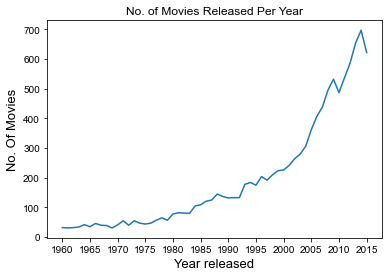

In [29]:
# line chart for a good visual
df_q1.plot(xticks = np.arange(1960,2016,5))
sns.set(rc={'figure.figsize':(9,10)})
plt.title("No. of Movies Released Per Year",fontsize = 12)
plt.xlabel('Year released',fontsize = 13)
plt.ylabel('No. Of Movies',fontsize = 13)

# Give the plot a whitegrid sheet style
sns.set_style("whitegrid")

> The line chart shows the volume of movies released from 1960 through 2016. The trend has been gradually progressive up to year 2000 and from the 2001, the number of movies released remarkably increased as the year goes by.

Let us investigate the years that experienced the least releaase of movies

In [30]:
# finding years with the least release of movies
df_q1[1969], df_q1[1960], df_q1[1965]

(31, 32, 35)

> From the chart, the year 1969 (31) has the least number of released movies, followed by 1960 (32) and and 1965 (35).

## Question 2: Is the most popular Genre also the most profitable?

Since all the movies in this dataset have multiple genres, there is need to split and explode the genre column and assign the new data to a another dataframe. It is evident that this will increase the number of columns.

We will also be creating a new dataframe to be used to answer this question

In [31]:
# create a new dataframe df_q2
df_q2 = df_new

> The split

In [32]:
# All genres separated with | will be split
df_q2 = df_q2.assign(genres=df_q2.genres.str.split('|')).explode('genres')

In [84]:
# Preview the new dataframe
df_q2.head(5) 

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget,revenue,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08


> Now we find the average popularity of the genres, group by genres and sort by porpularity

First of all, we define a function "meanCalc" to calculate the mean. The function will be used for further analysis.

In [122]:
# groupby mean of popularity for every genre
df_q2.groupby(['genres'],as_index=False)['popularity'].mean().sort_values(by=['popularity'])


,genres,popularity
20,unrecorded,0.171879
5,Documentary,0.181698
9,Foreign,0.192147
16,TV Movie,0.273758
11,Horror,0.466995
12,Music,0.493940
10,History,0.575936
19,Western,0.590615
6,Drama,0.592374
3,Comedy,0.593997


From the tail end of the preview, Science fiction and Adventure appear to be the genres with higher popularity. We will plot a bar chart to have better visual of the data

> We will be plotting a bar chart to properly visualize the data for better insight.

> Define a functioon 'plotFold' for the plot to be used for subsequent related plots.

In [125]:
# Define function plotFold for the bar chart
def plotFold(df,grpedVar,yVar,stat='mean',figsize=[12, 6], color='brown'):
    # define a function to return the plot of genre agaisnt popularity
    # grpedVar is the groupby column
    # yVar stands for the aggregating values to be used for the plots
    
    # plot definition
    df.groupby([grpedVar])[yVar].agg(stat).plot.barh(edgecolor='black',figsize=figsize, rot=0, width=0.8, color=color);
    plt.title(f'{stat} of {yVar}'.title(), fontsize = 14)
    plt.xlabel(grpedVar.title(), fontsize = 10)
    plt.ylabel(f'{stat} {yVar}'.title(), fontsize = 10, weight = "bold")

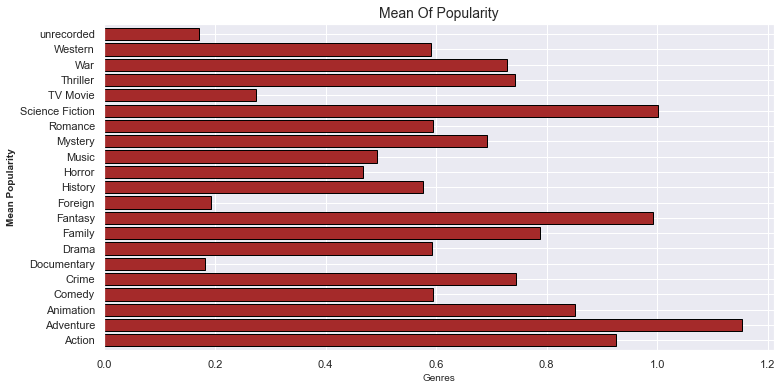

In [73]:
# call plot function for genres and popularity
plotFold(df_q2, 'genres', 'popularity')

> The most popular genre is adventure. Science fiction and Fanatasy came second and third respectively.

We will investigate genre and profit as well since we want to find out if the most popular genre is also the most profitable

In [124]:
# groupby mean of profit for every genre
df_q2.groupby(['genres'],as_index=False)['profit'].mean().sort_values(by=['profit'])

,genres,profit
9,Foreign,-5.980461e+05
20,unrecorded,-1.276447e+03
16,TV Movie,5.459457e+04
5,Documentary,1.644475e+06
11,Horror,1.639984e+07
10,History,2.139056e+07
19,Western,2.160382e+07
6,Drama,2.561250e+07
13,Mystery,3.148843e+07
3,Comedy,3.207162e+07


Now we plot to have a better visual

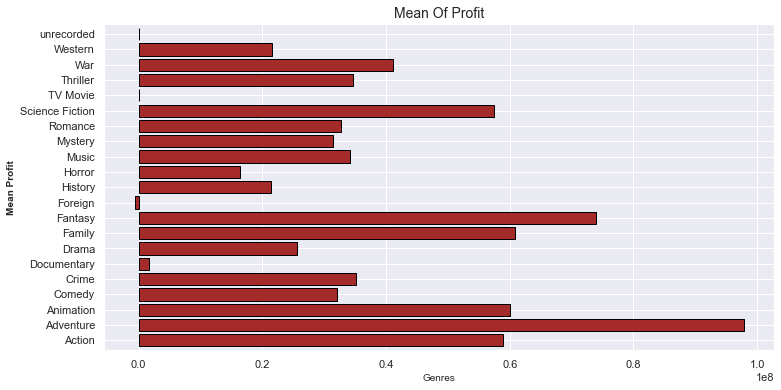

In [116]:
# call plot function for genres and profit
plotFold(df_q2, 'genres', 'profit')

From the bar chart, adventure is the most profitable genre while foreign is the least profitable with a negative value which is strange.

## Question: 3. What is the correlation between popularity and profit

We shall be using profit and popularity data to find the correlation on a chart between the two indicators

 The correlation Between Profit and Popularity is  0.5627965618029972


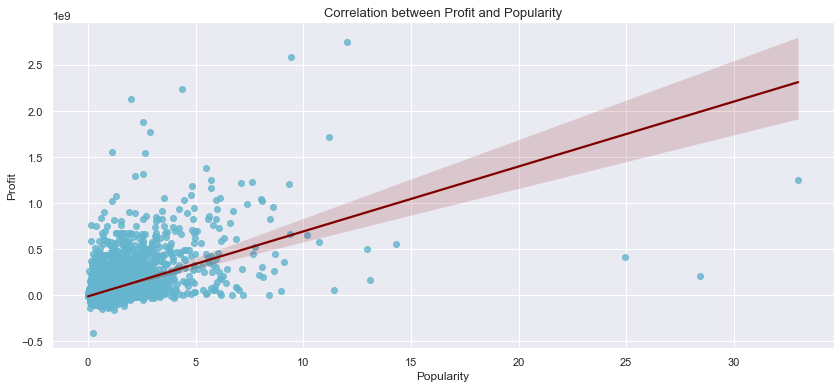

In [128]:
#set the figure size.
sns.set(rc={'figure.figsize':(14,6)})

cx = sns.regplot(x=df_new['popularity'],y=df_new['profit'],color='c',line_kws={"color":"maroon"})

#setup the title and the labels of the scatter plot.
cx.set_title("Correlation between Profit and Popularity",fontsize=13)
cx.set_xlabel("Popularity",fontsize=12)
cx.set_ylabel("Profit",fontsize=12)

#find the correlation between them.
dt_corr = df_new.corr()

print(" The correlation Between Profit and Popularity is ",dt_corr.loc['popularity','profit'])

We can say from the plot that profit and popularity have positive crrelation of 0.56. 
That is higher profits are made by movies that are popular

## Question 4: Who are the top 3 actors to feature in movies. How many movies did 50 Cent feature in?

There are more than one actor in a given movie, so we will have to separate them for this investigation

A new dataframe will be created as well to help answer this question

In [41]:
# create a new dataframe for this question
df_q5 = df_new

In [42]:
# split and explode cast column
df_q5 = df_q5.assign(cast=df_q5.cast.str.split('|')).explode('cast')

# lets preview the data
df_q5.head()

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget,revenue,profit
0,135397,32.985763,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Irrfan Khan,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Vincent D'Onofrio,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Nick Robinson,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


In [43]:
# we count the frequency of casts
df_q5.cast.value_counts()

unrecorded           76
Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
                     ..
Bronagh Gallagher     1
David Pearse          1
Adrian Hough          1
Pauley Perrette       1
Stephanie Nielson     1
Name: cast, Length: 18965, dtype: int64

From the count result, the number of casts that were not recorded or were replaced with zero dure to their NaN nature are 76.

Robert De Niro with 72 movies, Samuel L. Jackson with 71 and Bruce Willis are the top three actors by number of movies featured

> Let us find out how many movies 50 Cent featured in since he is not among the top or least featured actors 

In [44]:
# count how many movies 50 Cent was featured in
# print
print("50 Cent featured in ",df_q5.cast.str.count("50 Cent").sum(), 'movies')

50 Cent featured in  12 movies


<a id='conclusions'></a>
## Conclusions

> Question 1: Years 1969, 1960 and 1965 have the least number of released movies .

> Question 2: Yes. The most popular genre adventure is also the most profitable.

> Question 3: The correlation is 0.56. This implies that popular genres are more profitable than unpopular genres.

> Question 4: The top three actors who are most featured in movies are Robert De Niro (72), Samuel L. Jackson (71) and Bruce Willis (62).
>50 Cent featured in a total of 12 movies

## Limitations

> Limitation 1: About 50 % of budget and revenue data are zero, this has greatly affected profit calculation

> Limitation 2: There are many NaN values in the dataset which resulted in dropping many movies and this has immensely impacted the result of this analysis.

> Limitation 3: Also, budget and revenue columns are without currency units. It is very much possible that every movie have their budget and revenue in the local currency of their country of origin or production.